# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [100]:
# Import Necessary Libraries (Only once at the top)
!pip install pandas scikit-learn tensorflow matplotlib seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2


# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data

***Problem***: Predicting addiction risk among individuals based on their drug consumption patterns and other related factors.

***Data Description***: The dataset is from UCI/Kaggle and contains information about drug consumption for 1885 individuals.
It includes features like:

age, gender, education level, country of residence, ethnicity, personality traits (neuroticism, extraversion, openness, agreeableness, conscientiousness), impulsivity, sensation seeking, and self-reported drug usage for various substances (alcohol, amphetamines, cannabis, etc.).  The drug usage is categorized into different levels

In [101]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
df = pd.read_csv('/content/drug_consumption.data', header=None)

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [102]:
# Function definitions (All together before the main code)
def create_sober_model(input_shape, optimizer=None, regularizer=None, dropout_rate=None):
    """Creates a neural network model for addiction risk prediction."""

    inputs = Input(shape=input_shape)
    x = Dense(64, activation='relu', kernel_regularizer=regularizer)(inputs)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    x = Dense(32, activation='relu', kernel_regularizer=regularizer)(x)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    # Now there are 7 classes in the target variable.
    outputs = Dense(7, activation='softmax')(x) # 7 outputs for your 7 addiction risk categories

    model = Model(inputs=inputs, outputs=outputs)

    if optimizer:
        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    else:  # Default to Adam
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',  # Use appropriate loss
                      metrics=['accuracy'])

    return model

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [ ]:
def plot_loss_curve(history, title):
    """Plots the training and validation loss curves."""
    plt.figure(figsize=(12, 5))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title}: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title}: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints the classification report and confusion matrix."""
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Final Test Loss: {loss:.4f}, Final Test Accuracy: {accuracy:.4f}")
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))
    print(confusion_matrix(y_test,y_pred_classes))

# Data loading and preprocessing
# Load the dataset, filling in missing names.
column_names = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caffeine", "Cannabis", "Chocolate", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
df = pd.read_csv('/content/drug_consumption.data', names=column_names)

# Separate features and target
# Remove the Semer column, as it is all NaN values
df = df.drop("Semer", axis=1)
# Set y to be the VSA column.
X = df.drop("VSA", axis=1)
y = df["VSA"]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
def plot_loss_curve(history, title):
    """Plots the training and validation loss curves."""
    plt.figure(figsize=(12, 5))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title}: Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title}: Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints the classification report and confusion matrix."""
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Final Test Loss: {loss:.4f}, Final Test Accuracy: {accuracy:.4f}")
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))
    print(confusion_matrix(y_test,y_pred_classes))

# Data loading and preprocessing
# Load Data
# Load the dataset, filling in missing names.
column_names = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caffeine", "Cannabis", "Chocolate", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
df = pd.read_csv('/content/drug_consumption.data', names=column_names)

# Separate features and target
# Remove the Semer column, as it is all NaN values
df = df.drop("Semer", axis=1)
# Set y to be the VSA column.
X = df.drop("VSA", axis=1)
y = df["VSA"]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
# Label encode the target variable as well.
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints the classification report and confusion matrix."""
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Final Test Loss: {loss:.4f}, Final Test Accuracy: {accuracy:.4f}")
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))
    print(confusion_matrix(y_test,y_pred_classes))


In [ ]:
# Data loading and preprocessing
# Load Data
# Load the dataset, filling in missing names.
column_names = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caffeine", "Cannabis", "Chocolate", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
df = pd.read_csv('/content/drug_consumption.data', names=column_names)

# Separate features and target
# Remove the Semer column, as it is all NaN values
df = df.drop("Semer", axis=1)
# Set y to be the VSA column.
X = df.drop("VSA", axis=1)
y = df["VSA"]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
# Label encode the target variable as well.
le = LabelEncoder()
y = le.fit_transform(y)

# Apply Imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


# Apply Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Ethnicity' 'Nscore' 'Escore' 'Oscore' 'Ascore' 'Cscore' 'Impulsive' 'SS'
 'Alcohol' 'Amphet' 'Amyl' 'Benzos' 'Caffeine' 'Cannabis' 'Chocolate'
 'Coke' 'Crack' 'Ecstasy' 'Heroin' 'Ketamine' 'Legalh' 'LSD' 'Meth'
 'Mushrooms' 'Nicotine']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [117]:
!mkdir /content/saved_models

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3174 - loss: 1.8134 - val_accuracy: 1.0000 - val_loss: 0.9203
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9983 - loss: 0.7577 - val_accuracy: 1.0000 - val_loss: 0.2027
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.2043 - val_accuracy: 1.0000 - val_loss: 0.0837
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1016 - val_accuracy: 1.0000 - val_loss: 0.0666
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0818 - val_accuracy: 1.0000 - val_loss: 0.0613
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0719 - val_accuracy: 1.0000 - val_loss: 0.0584
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0682 - val_accuracy: 1.0000 - val_loss: 0.0562
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0660 - val_accuracy: 1.0000 - val_loss

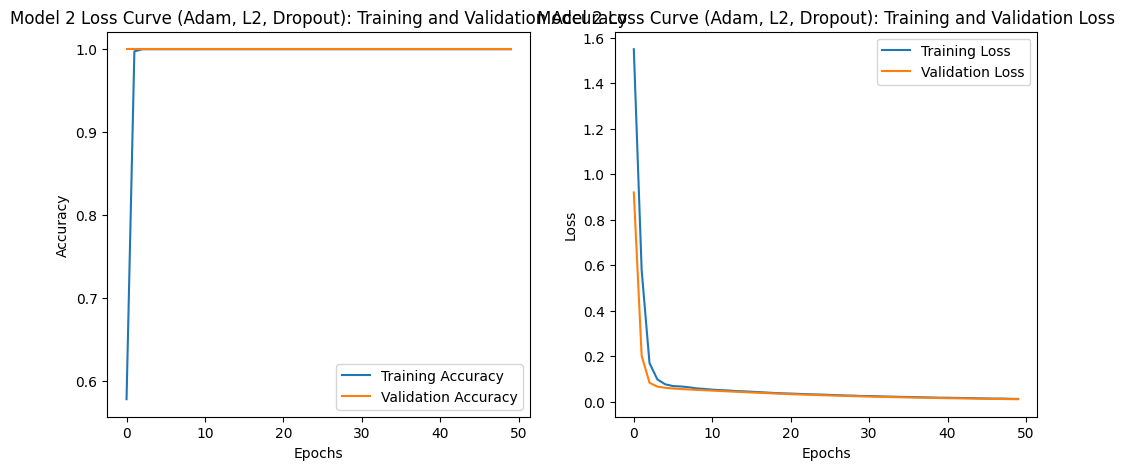

Final Test Loss: 0.0113, Final Test Accuracy: 1.0000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377

    accuracy                           1.00       377
   macro avg       1.00      1.00      1.00       377
weighted avg       1.00      1.00      1.00       377

[[377]]
Model 2 saved successfully!


In [122]:
# Model 2 (Adam, L2, Dropout)
optimizer_2 = Adam(learning_rate=0.001)
regularizer_2 = l2(0.001)
dropout_rate_2 = 0.3
input_shape = (X_train.shape[1],)
model_2 = create_sober_model(input_shape, optimizer_2, regularizer_2, dropout_rate_2)
history_2 = model_2.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=1)
plot_loss_curve(history_2, "Model 2 Loss Curve (Adam, L2, Dropout)")
evaluate_model(model_2, X_test, y_test)

# Save Model 2
try:
    model_2.save("/content/model_2.h5")  # Save model_2
    print("Model 2 saved successfully!")
except Exception as e:
    print(f"An error occurred while saving model_2: {e}")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0071 - loss: 1.9695 - val_accuracy: 0.0477 - val_loss: 1.8850
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0914 - loss: 1.8669 - val_accuracy: 0.1432 - val_loss: 1.8088
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2121 - loss: 1.7909 - val_accuracy: 0.3448 - val_loss: 1.7364
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4076 - loss: 1.7105 - val_accuracy: 0.5517 - val_loss: 1.6654
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5645 - loss: 1.6467 - val_accuracy: 0.6684 - val_loss: 1.5957
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7050 - loss: 1.5782 - val_accuracy: 0.8090 - val_loss: 1.5265
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8330 - loss: 1.5053 - val_accuracy: 0.9098 - val_loss: 1.4584
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9276 - loss: 1.4381 - val_accuracy: 0.

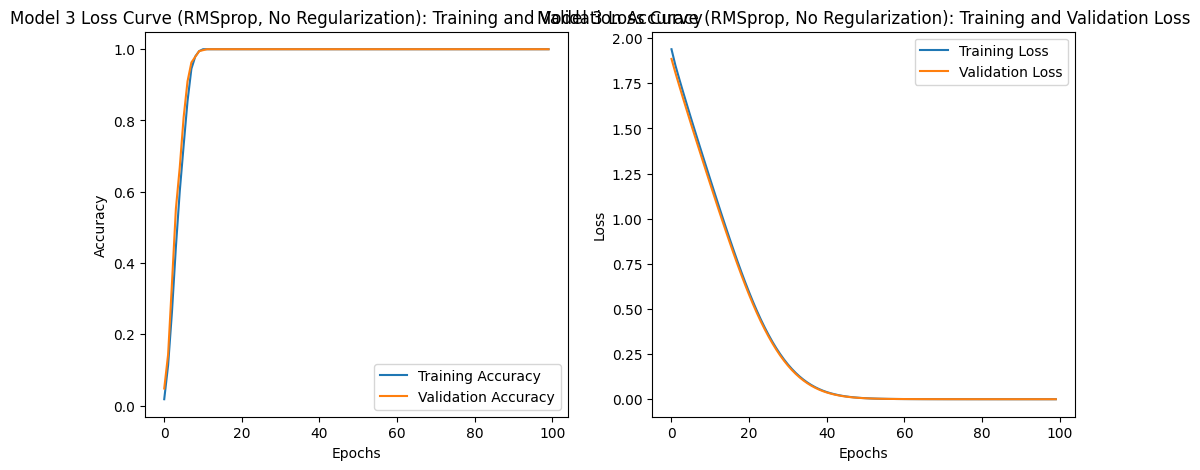

Final Test Loss: 0.0001, Final Test Accuracy: 1.0000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377

    accuracy                           1.00       377
   macro avg       1.00      1.00      1.00       377
weighted avg       1.00      1.00      1.00       377

[[377]]
Model 3 saved successfully!


In [123]:
# Model 3 (RMSprop, No Regularization)
optimizer_3 = RMSprop(learning_rate=0.0001)  # Experiment with different learning rates
model_3 = create_sober_model(input_shape, optimizer_3)
history_3 = model_3.fit(X_train, y_train, epochs=100,  # Experiment with number of epochs
                        validation_data=(X_val, y_val),
                        verbose=1,
                        batch_size=64)  # Experiment with batch size
plot_loss_curve(history_3, "Model 3 Loss Curve (RMSprop, No Regularization)")
evaluate_model(model_3, X_test, y_test)

try:
    model_3.save("/content/model_3.h5")  # Save model_3
    print("Model 3 saved successfully!")
except Exception as e:
    print(f"An error occurred while saving model_3: {e}")

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9040 - loss: 1.2695 - val_accuracy: 1.0000 - val_loss: 0.3351
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.1919 - val_accuracy: 1.0000 - val_loss: 0.0376
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0286 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss

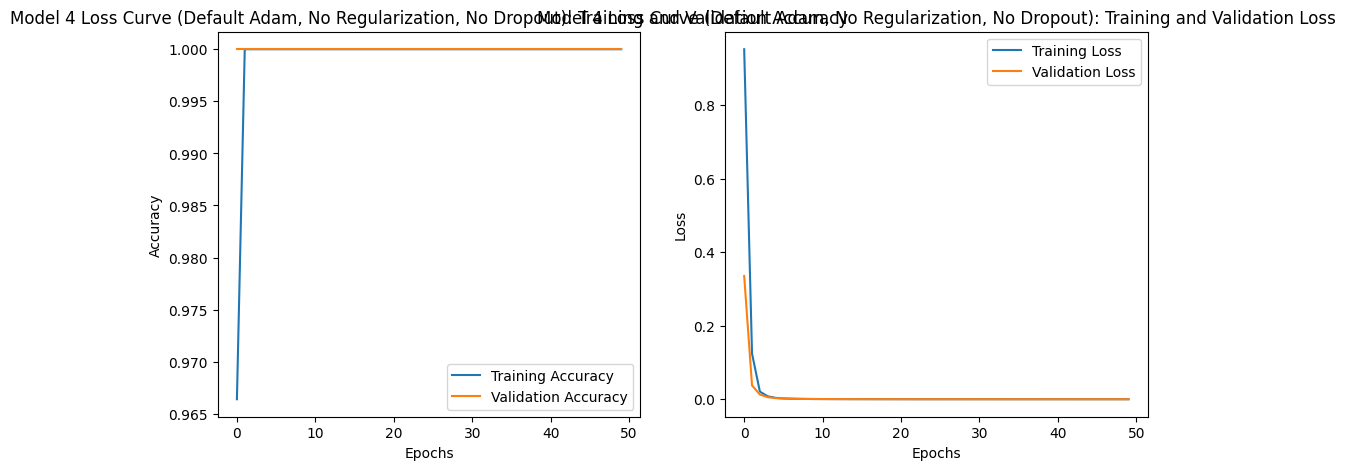

Final Test Loss: 0.0000, Final Test Accuracy: 1.0000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377

    accuracy                           1.00       377
   macro avg       1.00      1.00      1.00       377
weighted avg       1.00      1.00      1.00       377

[[377]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [125]:

# Create the model
model_4 = create_sober_model(input_shape)  # No optimizer, regularizer, or dropout_rate specified

# Train the model
history_4 = model_4.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=1)

# Plot the loss curve
plot_loss_curve(history_4, "Model 4 Loss Curve (Default Adam, No Regularization, No Dropout)")

# Evaluate the model and print metrics
evaluate_model(model_4, X_test, y_test)



#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [109]:
def make_predictions(model_path, X):
    """Makes predictions using the loaded model."""

    try:
        # Load the model
        model = load_model(model_path)
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None

    try:
        # Make predictions (probabilities)
        probabilities = model.predict(X)

        # Convert probabilities to class labels (0, 1, or 2)
        predictions = np.argmax(probabilities, axis=1)  # Get index of max probability

        return predictions, probabilities  # Return both

    except Exception as e:
        print(f"Error during prediction: {e}")
        return None, None  # Handle prediction errors



In [115]:
#Save the model as an h5 file
try:
  model_4.save("/content/best_model.h5")
  print("Model saved successfully!")
except Exception as e:
  print(f"An error occurred while saving the model: {e}")
model_path = "/content/best_model.h5" # set the correct model path
predictions, probabilities = make_predictions(model_path, X_test)

Model saved successfully!
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [126]:

if predictions is not None:
    print("Predictions:", predictions)
    print("Probabilities:", probabilities)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
Probabilities: [[9.9997443e-01 1.7950799e-06 1.3920589e-06 ... 1.2454006e-05
  3.1977240e-06 6.0082857e-06]
 [9.9997884e-01 2.5734939e-06 1.4260258e-06 ... 9.5692158e-06
  2.3015232e-06 4.7535736e-06]
 [9.9999565e-01 2.66

Congratulations!!


In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
